## Introduction
"The **Central Limit Theorem** (CLT) establishes that, in many situations, for identically distributed independent (**i.i.d**) samples, the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions." (*from [wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)*)

In simpler words it means that no matter the distribution of the original variables, if we sample longer enough our variables and under certains assumptions, the sample's distribution will look like a normal distribution.

**But how can we see and understand what's the theorem is saying without being a mathematician ?**

This notebook is inspired by [3Blue1Brown's youtube video](https://www.youtube.com/watch?v=zeJD6dqJ5lo) and it implements, in Python, the experiments showed in the video allowing to use intuition to understand this fundamental theorem of probability theory.

Some remainders on mathematical concepts and definition will be given but you're strongly incouraged to watch the video for a better understanding which will be also facilitated by the beautiful animations.

This notebook main reason of existence is to reproduce those experiments in Python.

## Rolling fair dice
Let's start with rolling a die several times since it is the easiest way to create identically distributed and independent samples and everybody should be familiar with and be capable of use intuition.

If the die is fair, we already know that there is $\frac{1}{6th}$ chances to get one of the 6 numbers. 

Let's simulate it !

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This cell must be run only once (it moves the path one level up as "cd ..")
import os
current_path = os.getcwd()
print(current_path)
base_path, _ = os.path.split(current_path)
os.chdir(base_path)
os.getcwd()

/Users/francesco/REPOS/CLT/notebooks


'/Users/francesco/REPOS/CLT'

In [3]:
import numpy as np

from scripts.die import Die
from scripts.plots import plot_rolls_distribution, plot_dice_sum_distribution

In [5]:
fair_die = Die()
# By default the die is fair but we can change that (and we will, later on)
# The probability for every number to be picked is 1/6 ~= 0.166 (16%)
print("die's weights:")
print(fair_die.weights)
print("")
# The cumulative probabilities are useful to extract a number from a die by randomly extracting a number between 0 and 1.
# Notice that for a fair die the intervals have the same lenght, e.g. :
# if random is between 0 and 0.16, then it's a 1
# if random is between 0.16 and 0.33, then it's a 2
# ...
# if random is between 0.833 and 0.999, then it's a 6
print("corresponding cumulative probabilities:")
print(fair_die.cumulative_probs)

die's weights:
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]

corresponding cumulative probabilities:
[0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]


In [6]:
# Let's roll the die 10k times
n_rolls = 10000
results = fair_die.roll(n_rolls=n_rolls)
print(f"Results for the first 10 rolls: ", results[:10])

Results for the first 10 rolls:  [4, 1, 1, 4, 6, 1, 2, 4, 1, 5]


mu =  3.464
std =  1.7113456693491238


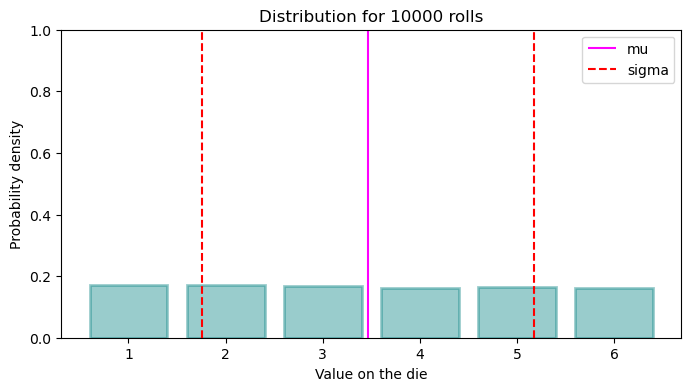

In [7]:
# And plot the outcomes distribution
mu, std = plot_rolls_distribution(results, density=True)

We clearly see that for a large number of rolls we end up with a flat distribution for a fair die with each number having a probability of $\frac{1}{6th} \simeq 0.16$ to be obtained, as expected.

We also calculated the **mean** and the **standard deviation** of the distribution which will be useful later on.

The mean or center of mass of the distribution is the [expected value](https://en.wikipedia.org/wiki/Expected_value) of our random variable, $x$,  which is calculated by taking the probability of every possible outcome and multiply it by the value of the variable:
$$
\mu = E(X) = \sum_{x} P(X=x)*x
$$

For a fair die (and a sufficiently large number of rolls) the mean is obviously ~3.5 .

The [standard deviation](https://en.wikipedia.org/wiki/Deviation_(statistics)) is a way to measure how spread the distribution is around the mean and it's calculated as:
$$
\sigma = \sqrt{Var(X)} = \sqrt{E(X-\mu)^2} = \sqrt{\sum_{x} P(X=x)*(x-\mu)^2}
$$

## Rolling multiple fair dice

Let's see now what happens if we rolls multiple dice and we store the results, i.e. the sum of all numbers appearing on the top.

### Two dice

To start let's consider only 2 fair dice that we roll many times and everytime we write down the result

In [8]:
# Let's roll 2 dice 10k times
results = fair_die.roll(n_rolls=10000, n_dice=2)
print(f"First 10 results: ", results[:10])

First 10 results:  [4, 3, 4, 2, 4, 4, 7, 5, 7, 9]


mu =  6.9918
std =  2.4300067407313914


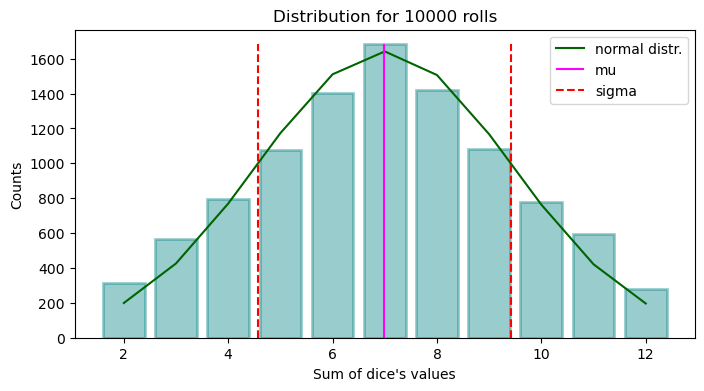

In [9]:
# And plot the results distribution
plot_dice_sum_distribution(results, density=False)

We clearly see that the sum of two dice distribution for 10k rolls takes the shape of a normal distribution with $\mu \simeq 7$ which is indeed the most probable outcome when you roll 2 dice.

By setting `density=True` we can see the normalized version of the plot which is directly related to the probability

mu =  6.9918
std =  2.4300067407313914


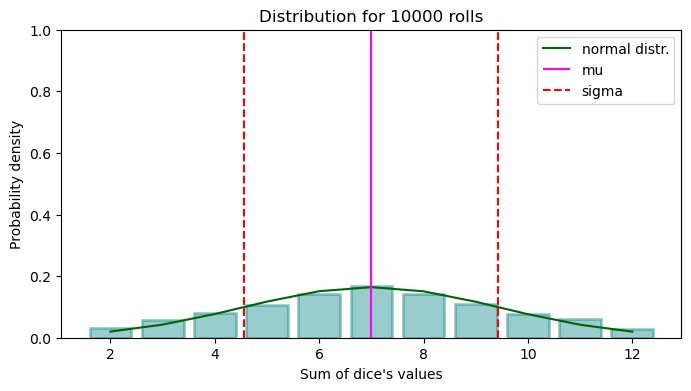

In [10]:
# Plot the normalized distribution
plot_dice_sum_distribution(results, density=True)

In [11]:
label, counts = np.unique(results, return_counts=True)
print("outcome and corresponding probability :")
for i, lab in np.ndenumerate(label):
    norm_counts = counts[i] / np.sum(counts)
    print(f"P({lab}) = {norm_counts} ({round(norm_counts*100, 2)} %)")

outcome and corresponding probability :
P(2) = 0.0314 (3.14 %)
P(3) = 0.0567 (5.67 %)
P(4) = 0.0796 (7.96 %)
P(5) = 0.1077 (10.77 %)
P(6) = 0.1404 (14.04 %)
P(7) = 0.1682 (16.82 %)
P(8) = 0.1423 (14.23 %)
P(9) = 0.1083 (10.83 %)
P(10) = 0.078 (7.8 %)
P(11) = 0.0597 (5.97 %)
P(12) = 0.0277 (2.77 %)


**Explanation :**

For two independ dice we roll we have 36 possible combinations. This number comes from the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):
$$
\left(\frac{n}{k}\right) = \frac{n!}{k!(n-k)!}
$$

In our simple case, for one die, we have:
$$
\left(\frac{6}{1}\right) = \frac{6!}{1!(6-1)!} = 6
$$

Therefore for 2 dice we have:
$$
\left(\frac{6}{1}\right)*\left(\frac{6}{1}\right) = 6*6 = 36
$$

The only way to obtain a 2 is by rolling 1 on both dice. There is therefore only 1 way out of the 36 possible combinations to get that result meaning that the probability of having 2 with 2 dice is $1/36 \simeq 0.027$ (2.7 %).
The same applys for a 12 since the only way to obtain it is with a double 6.

Similarly, to obtain a 3 we have 2 ways: 1 on the first die and 2 on the second die or the inverse. The probability is therefore $2/36 \simeq 0.055$ (5.7 %).

You can convince yourself that 7 is the most probable outcome with a probability of $6/36 \simeq 0.166$ (16.6 %).